In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 156249 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf'
font_name = fm.FontProperties(fname=path).get_name()
print(font_name)

plt.rc('font', family = font_name)
fm._rebuild()

NanumSquareRound


In [ ]:
from wordcloud import WordCloud
from PIL import Image
from collections import Counter
import numpy as np

In [ ]:
pos_list = df[df['rating'] >= 4]
neg_list = df[df['rating'] <= 3]

In [ ]:
pos_reviews = ''
   
for i in pos_list['review'] : 
  pos_reviews = pos_reviews + i + '\n'

In [ ]:
neg_reviews = ''
   
for i in neg_list['review'] : 
  neg_reviews = neg_reviews + i + '\n'

In [ ]:
pos_token = okt.morphs(pos_reviews)
neg_token = okt.morphs(neg_reviews)

In [ ]:
pos_words = []
for i in pos_token : 
  if i in ps_function : # 긍정-부정 점수 차이가 가장 큰 분류를 넣으면 됨
    pos_words.append(i)

In [ ]:
neg_words = []
for i in neg_token : 
  if i in ng_function : # 긍정-부정 점수 차이가 가장 큰 분류를 넣으면 됨
    neg_words.append(i)

In [ ]:
pos_c = Counter(pos_words)
neg_c = Counter(neg_words)

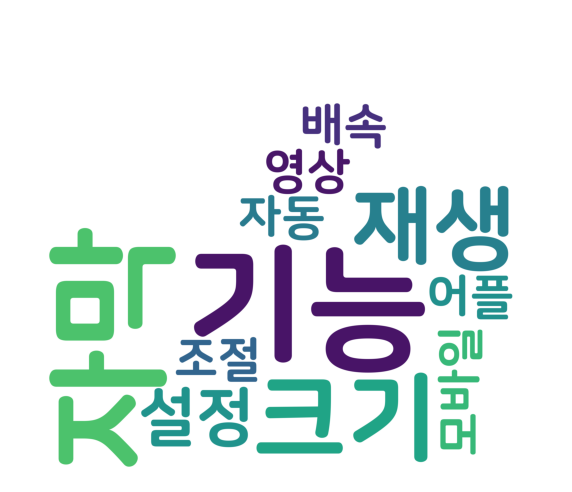

In [ ]:
img = Image.open('good.png')
img_array = np.array(img)

wc = WordCloud(font_path=path, mask=img_array,background_color='white')
gen = wc.generate_from_frequencies(pos_c)

plt.figure(figsize=(10,12))
plt.axis("off")
plt.imshow(gen)

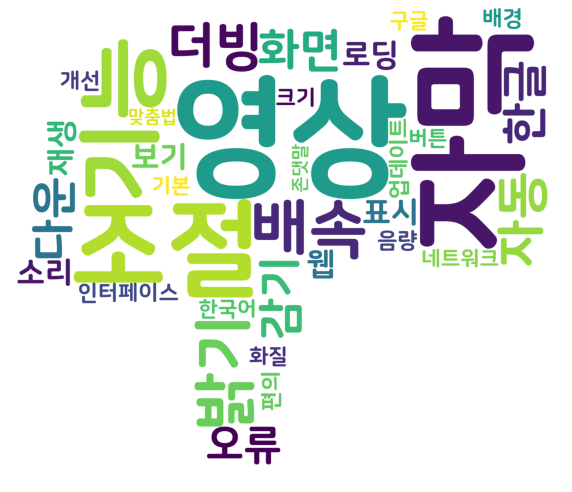

In [ ]:
img = Image.open('bad.png')
img_array = np.array(img)

wc = WordCloud(font_path=path,mask=img_array,background_color='white')
gen = wc.generate_from_frequencies(neg_c)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(gen)